# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
!pip3 install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.svm import SVC
import random
import cvxpy as cp
# from cvpxy import *
import seaborn as sns
from sklearn.model_selection import train_test_split

### Subsection 1

In [ ]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

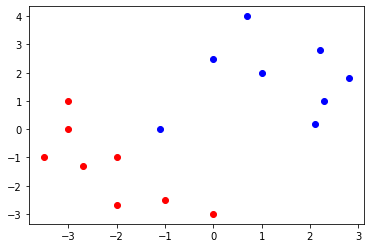

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

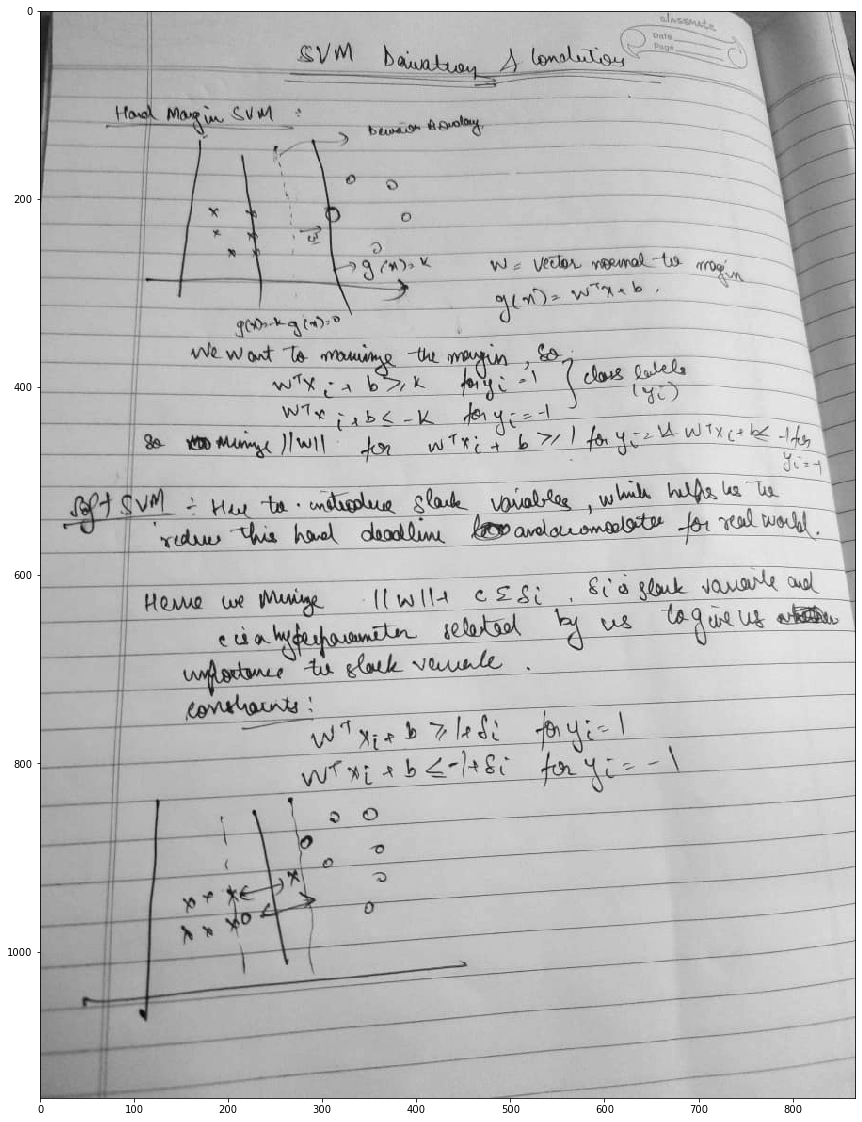

In [5]:
# import cv2
# import matplotlib.pyplot as plt
# img = cv2.imread('SVM.jpeg', 0) 
# plt.figure(figsize = (30,20))

# plt.imshow(img, cmap='gray',interpolation='nearest')


In [ ]:
# Write your code here
# here c stands if softsvm needed
def svm(x,y,c=None,u_num=9,v_num=9,d=2):
  a=cp.Variable((d,1))
  b=cp.Variable()

  obj=None
  const=None
  if(c==None):
    obj=cp.Minimize((cp.norm(a,2)))
    x_len=len(x)
    y_len=len(y)
    x_const=[];y_const=[]
    for i in range(int(x_len/2)):
      x_const.append(a.T@x[i]+b>=1)
    for i in range(int(x_len/2),x_len):
      y_const.append(a.T@x[i]+b<=-1)
    
    const=x_const+y_const
    # print(const)
  else:
    x_const=[];y_const=[];u_const=[];v_const=[]
    u=cp.Variable(u_num)
    v=cp.Variable(v_num)
    gamma=cp.Parameter();gamma.value=c;
    obj=cp.Minimize(cp.norm(a,2)+gamma*(np.ones(u_num)@u+np.ones(v_num)@v))
    for i in range(u_num):
      x_const.append(a.T@x[i]+b>=1-u[i])
      u_const.append(u[i]>=0)
    for i in range(u_num,u_num+v_num):
      y_const.append(a.T@x[i]+b<=-1+v[i-u_num])
    for i in range(v_num):
      v_const.append(v[i]>=0)
    
    const=x_const+y_const+u_const+v_const 

  prob=cp.Problem(obj,const)
  prob.solve()
  print("status: ",prob.status)
  return a.value,b.value
  

In [ ]:
def predict(x, y, w, b):
  
    corr=0
    for i,row in enumerate(x):
      calc = row.dot(w) + b
      if ((calc<0 and y[i]==-1)or(calc>0 and y[i]==1)):
          corr+=1

    print("Accuracy = ",corr/x.shape[0])


In [ ]:
w,b=svm(X,y)
print(w,b)
predict(X,y,w,b)


status:  optimal
[[-1.73913043]
 [-1.30434783]] -2.9130434783188317
Accuracy =  1.0


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [ ]:
# Write your code here
def plot_svm(x,y,w,b):
  low=np.array(x[(y==1)]);up=np.array(x[(y!=1)])
  x_plot=np.linspace(-8,8,20)
  plt.scatter(low[:,0],low[:,1],c='r')
  plt.scatter(up[:,0],up[:,1],c='b')
  plt.plot(x_plot,(-b - w[0]*x_plot)/w[1],'m')
  plt.plot(x_plot,(-b - w[0]*x_plot+1)/w[1],'g--')
  plt.plot(x_plot,(-b - w[0]*x_plot-1)/w[1],'y--')




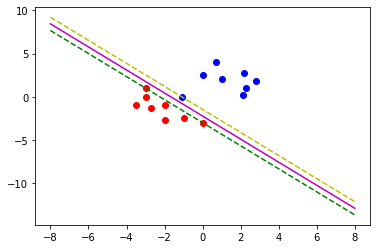

In [ ]:
plot_svm(X,y,w,b)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

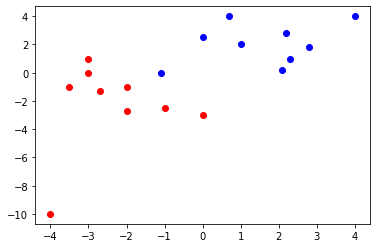

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
new_x=np.vstack([np.insert(X,8,[-4,-10],axis=0),np.array([4,4])])
new_y=np.append(np.insert(y,8,[1]),[-1])
plot_points(new_x,new_y)
plt.show()

status:  optimal
[[-1.73913043]
 [-1.30434783]] -2.9130434783188317
Accuracy =  1.0


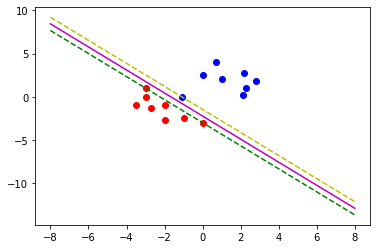

In [ ]:
# Solve for the decision boundary using this modified dataset
w,b=svm(X,y)
print(w,b)
predict(X,y,w,b)
plot_svm(X,y,w,b)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

status:  optimal
[[-1.43253146e-12]
 [-1.55765611e-12]] 0.06885090599738183
Accuracy =  0.5


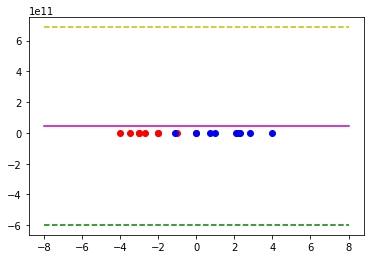

In [ ]:
# Write your code here for C= 0.01
w,b=svm(new_x,new_y,c=0.01)
print(w,b)
predict(new_x,new_y,w,b)
plot_svm(new_x,new_y,w,b)

status:  optimal
[[-0.35022764]
 [-0.29954473]] -0.05068290650435438
Accuracy =  0.9444444444444444


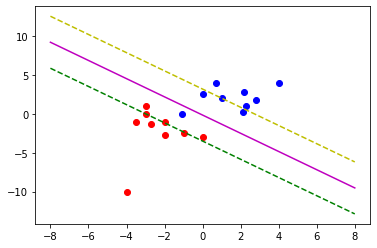

In [ ]:
# Write your code here for C= 0.1
w,b=svm(new_x,new_y,c=0.1)
print(w,b)
predict(new_x,new_y,w,b)
plot_svm(new_x,new_y,w,b)

status:  optimal
[[-1.73913044]
 [-1.30434783]] -2.913043478685383
Accuracy =  1.0


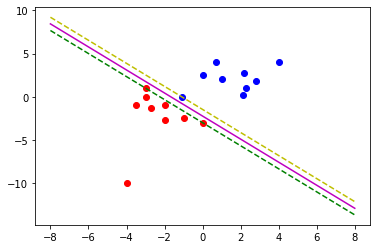

In [ ]:
# Write your code here for C= 3
w,b=svm(new_x,new_y,c=3)
print(w,b)
predict(new_x,new_y,w,b)
plot_svm(new_x,new_y,w,b)

status:  optimal
[[-1.73913044]
 [-1.30434783]] -2.91304347879632
Accuracy =  1.0


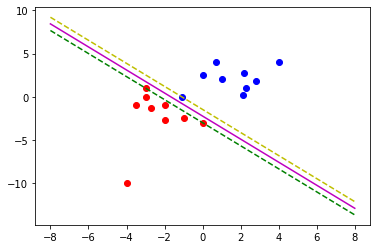

In [ ]:
# Write your code here for C= 10
w,b=svm(new_x,new_y,c=10)
print(w,b)
predict(new_x,new_y,w,b)
plot_svm(new_x,new_y,w,b)

status:  optimal
[[-1.73913043]
 [-1.30434783]] -2.9130434784426154
Accuracy =  1.0


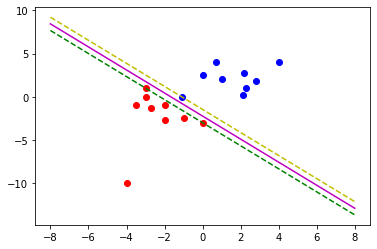

In [ ]:
# Write your code here for C= 100
w,b=svm(new_x,new_y,c=100)
print(w,b)
predict(new_x,new_y,w,b)
plot_svm(new_x,new_y,w,b)

A lower grade of C indicates that the classification error was not punished. This makes the decision border "softer" and enables for more values to be incorrectly categorised. Because we didn't penalise the decision boundary for the same, as can be shown for the example C=0.01, the decision border incorrectly classifies the majority of the points. Yet, misclassification is penalised more as the C value is raised. The values for W and b are the same as in the hard margin SVM classifier, which also reflects the fact that it becomes identical to the hard margin SVM for very large C values (as in the case of C=100).

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

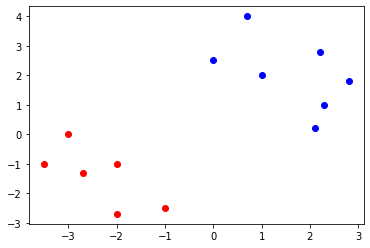

In [ ]:
# Write your Code here
x_remove=X.copy().tolist()
del x_remove[7:9];del x_remove[2:3];
y_remove=y.copy().tolist()
del y_remove[7:9];del y_remove[2:3];
x_remove=np.array(x_remove);y_remove=np.array(y_remove)
plot_points(x_remove,y_remove)
plt.show()

status:  optimal
[[-0.38493724]
 [-0.35146444]] -0.12133891221723082
Accuracy =  1.0


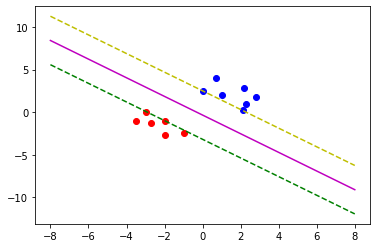

In [ ]:
# Write your code here for C= 100
w,b=svm(x_remove,y_remove,100,6,7)
print(w,b)
predict(x_remove,y_remove,w,b)
plot_svm(x_remove,y_remove,w,b)

After removing the old support vectors, we can see that the new data has both the classes separated well apart. The new decision boundary also depicts the same. Also the new support vectors are [[-2. -1. ], [ 0. 2.5], [ 2.1 0.2]], which also seems to be closest to the decision boundry as visualized from the plot.



The data points that are closest to an SVM classifier's decision boundary are known as support vectors. Due to their importance in defining the boundary and calculating the maximum margin between the two classes, they are essential to the SVM algorithm. As a result, an SVM classifier's decision boundary can be drastically altered by eliminating support vectors from the dataset.
The most crucial data points that establish the decision boundary are actually removed from the dataset when support vectors are removed. Due to the decision border now being based on a smaller amount of data points, it may move or become less accurate.

Moreover, the decision boundary may grow more complex to match the remaining data points, which might impair the classifier's capacity to generalise to new, untested data. Removing support vectors can also result in overfitting.

In conclusion, support vectors are crucial for specifying the decision boundary of an SVM classifier, and their removal may cause the decision boundary to alter significantly, potentially resulting in overfitting and decreased accuracy.

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-28 21:47:46--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.96.0|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.05s   

2023-03-28 21:47:46 (193 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-28 21:47:46--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.96.0|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [app

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [ ]:
def classification_report(model,y_test,prediction):
  print("Accuracy score: ",metrics.accuracy_score(y_test,prediction))
  print("Classification report: \n",metrics.classification_report(y_test, prediction))
  conf_matrix=metrics.confusion_matrix(y_test, prediction)
  disp=metrics.ConfusionMatrixDisplay(conf_matrix)
  disp.plot()
  plt.show()

Accuracy score:  0.9336666666666666
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.97      0.98      0.97       346
           2       0.93      0.96      0.94       312
           3       0.91      0.92      0.91       279
           4       0.91      0.95      0.93       281
           5       0.91      0.94      0.92       265
           6       0.96      0.94      0.95       290
           7       0.94      0.87      0.91       303
           8       0.96      0.90      0.93       301
           9       0.89      0.90      0.89       326

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



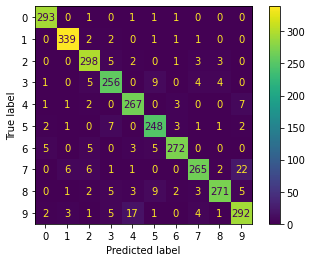

In [ ]:
from sklearn import svm, metrics
svm_sklearn = svm.SVC()
svm_sklearn.fit(X_train, y_train)
predicted = svm_sklearn.predict(X_test)
classification_report(svm_sklearn,y_test,predicted)

Accuracy score:  0.8893333333333333
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



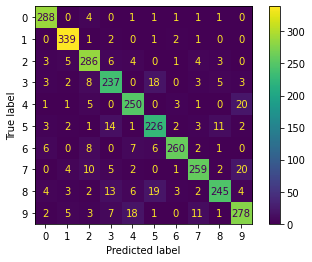

In [ ]:
svm_sklearn = svm.SVC(C=100,kernel='linear')
svm_sklearn.fit(X_train, y_train)
predicted = svm_sklearn.predict(X_test)
classification_report(svm_sklearn,y_test,predicted)

Accuracy score:  0.8893333333333333
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



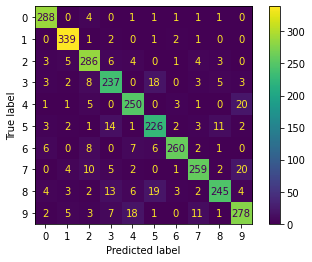

In [ ]:
svm_sklearn = svm.SVC(C=100,gamma='scale',kernel='linear')
svm_sklearn.fit(X_train, y_train)
predicted = svm_sklearn.predict(X_test)
classification_report(svm_sklearn,y_test,predicted)

Accuracy score:  0.8893333333333333
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



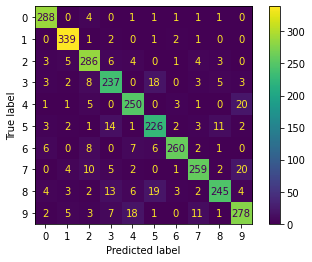

In [ ]:
svm_sklearn = svm.SVC(kernel='linear')
svm_sklearn.fit(X_train, y_train)
predicted = svm_sklearn.predict(X_test)
classification_report(svm_sklearn,y_test,predicted)

Accuracy score:  0.9173333333333333
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       297
           1       0.89      0.99      0.94       346
           2       0.95      0.92      0.93       312
           3       0.91      0.89      0.90       279
           4       0.86      0.93      0.89       281
           5       0.89      0.91      0.90       265
           6       0.95      0.94      0.95       290
           7       0.93      0.87      0.90       303
           8       0.94      0.90      0.92       301
           9       0.89      0.88      0.89       326

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



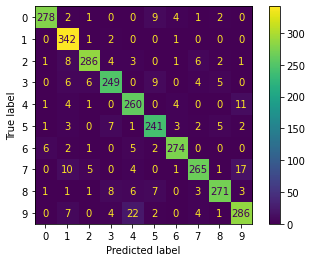

In [ ]:
svm_sklearn = svm.SVC(kernel='poly')
svm_sklearn.fit(X_train, y_train)
predicted = svm_sklearn.predict(X_test)
classification_report(svm_sklearn,y_test,predicted)

Accuracy score:  0.9336666666666666
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.97      0.98      0.97       346
           2       0.93      0.96      0.94       312
           3       0.91      0.92      0.91       279
           4       0.91      0.95      0.93       281
           5       0.91      0.94      0.92       265
           6       0.96      0.94      0.95       290
           7       0.94      0.87      0.91       303
           8       0.96      0.90      0.93       301
           9       0.89      0.90      0.89       326

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



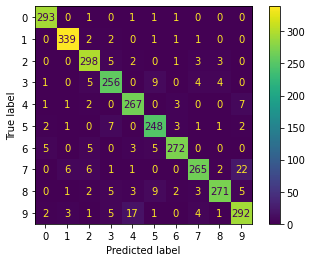

In [ ]:
svm_sklearn = svm.SVC(kernel='rbf')
svm_sklearn.fit(X_train, y_train)
predicted = svm_sklearn.predict(X_test)
classification_report(svm_sklearn,y_test,predicted)

Accuracy score:  0.8416666666666667
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       297
           1       0.91      0.98      0.94       346
           2       0.85      0.87      0.86       312
           3       0.80      0.75      0.77       279
           4       0.82      0.88      0.85       281
           5       0.67      0.75      0.71       265
           6       0.94      0.84      0.89       290
           7       0.89      0.83      0.86       303
           8       0.89      0.76      0.82       301
           9       0.81      0.79      0.80       326

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.85      0.84      0.84      3000



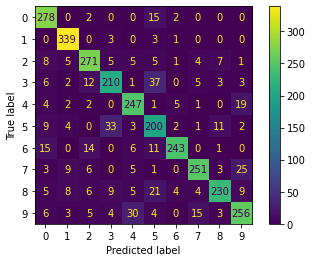

In [ ]:
svm_sklearn = svm.SVC(kernel='sigmoid')
svm_sklearn.fit(X_train, y_train)
predicted = svm_sklearn.predict(X_test)
classification_report(svm_sklearn,y_test,predicted)